In [38]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
from time import strftime
import matplotlib.pyplot as plt
from matplotlib import style
import csv
import json
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,consumer_secret,access_token,access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [39]:
# Target Search Term
target_terms = ("BBCWorld", "CBSNews", "CNN", "Foxnews", "NYTimes")
# “@BBC”, “@CBS”, “@CNN”, “@Fox”, “@New York times”


sentiment_array=[]
sentiment_array_avg=[]

# Loop through all tweets
for target_term in target_terms:
   counter=1
   # Lists to hold sentiments
   compound_list = []
   positive_list = []
   negative_list = []
   neutral_list = []
   tweets_ago= []

   for x in range(5):
       public_tweets = api.user_timeline(target_term, page=x)

       # Loop through all tweets
       for tweet in public_tweets:
           text=tweet["text"]

           # Run Vader Analysis on each tweet
           compound = analyzer.polarity_scores(tweet["text"])["compound"]
           pos = analyzer.polarity_scores(tweet["text"])["pos"]
           neu = analyzer.polarity_scores(tweet["text"])["neu"]
           neg = analyzer.polarity_scores(tweet["text"])["neg"]

           # Add each value to the appropriate array
           compound_list.append(compound)
           positive_list.append(pos)
           negative_list.append(neg)
           neutral_list.append(neu)
           tweets_ago.append(counter)

           sentiments={"Target_term": target_term,
                       "Text":text,
                       "Compound Score":compound,
                       "Positive Score":pos,
                       "Negative Score":neg,
                       "Neutral Score":neu,
                       "Tweets Ago":counter}

           sentiment_array.append(sentiments)

           # Store the Average Sentiments
           sentiment_array_avg.append({"Target_term": target_term,
                                       "Comppound Score":np.average(compound_list),
                                       "Positive Score":np.average(positive_list),
                                       "Negative Score":np.average(negative_list),
                                       "Neutral Score":np.average(neutral_list)})


           counter+=1

In [40]:
sentiment_array_df = pd.DataFrame(sentiment_array)

# Reordering columns
sentiment_array_rdf= sentiment_array_df[["Target_term","Text","Compound Score","Positive Score","Neutral Score","Negative Score","Tweets Ago"]]

# Saving data to CSV file
sentiment_array_rdf.to_csv("News_Sentiment_Data.csv", index=False, header=True)
sentiment_array_rdf.head()


,Target_term,Text,Compound Score,Positive Score,Neutral Score,Negative Score,Tweets Ago
0,BBCWorld,Polls suggest Ireland votes to scrap blasphemy...,0.0000,0.000,1.000,0.000,1
1,BBCWorld,Barry and Honey Sherman: Family offers $10m re...,-0.2263,0.202,0.546,0.251,2
2,BBCWorld,@BBCBreaking FBI analysis uncovered a fingerpr...,0.0000,0.000,1.000,0.000,3
3,BBCWorld,"@BBCBreaking ""These are not hoax devices""\n\nF...",0.2057,0.083,0.917,0.000,4
4,BBCWorld,"@BBCBreaking ""We will not tolerate such lawles...",0.0000,0.000,1.000,0.000,5


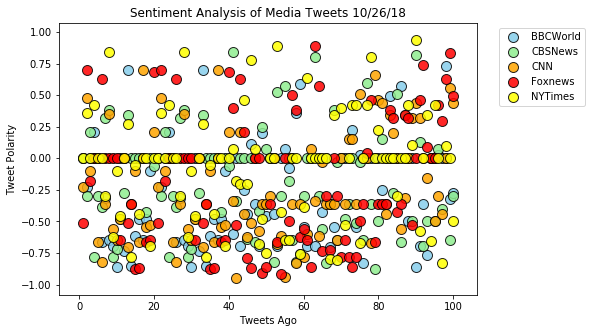

In [41]:
Color = {"BBCWorld":"Skyblue", "CBSNews":"LightGreen", "CNN":"Orange", "Foxnews":"Red", "NYTimes":"Yellow"}

# Plotting scatter plot for all news orgrs in a loop
plt.figure(figsize = (7.5,5.0))
for newsorg in Color.keys():
   #print(newsorg)
   Curr = sentiment_array_rdf[sentiment_array_rdf["Target_term"] == newsorg]
   # Build the scatter plots for each News Organization
   plt.scatter(Curr["Tweets Ago"], Curr["Compound Score"], s=100, c=Color[newsorg],edgecolors="black",label=newsorg,alpha=0.85)
# Setting Legend, Title, Labels for X & Y Axis
plt.legend(bbox_to_anchor=(1.04,1),loc="upper left")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets %s" % time.strftime ("%x"))
plt.savefig("SentimentAnalysis.png")
plt.show()

In [50]:
aggre_compound = sentiment_array_rdf.groupby(["Target_term"]).mean()["Compound Score"].round(3)
print(aggre_compound)

x_axis= []
x_axis= sentiment_array_rdf["Target_term"].unique()

print(x_axis)



Target_term
BBCWorld   -0.237
CBSNews    -0.169
CNN        -0.212
Foxnews    -0.160
NYTimes    -0.058
Name: Compound Score, dtype: float64
['BBCWorld' 'CBSNews' 'CNN' 'Foxnews' 'NYTimes']


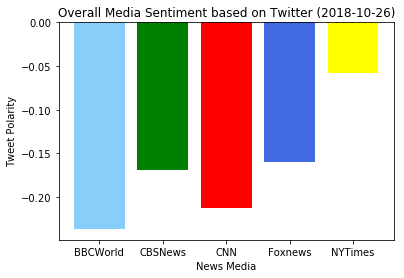

In [51]:

# Plotting the graph
plt.bar(x_axis, aggre_compound, color=["Lightskyblue","Green","Red","Royalblue","Yellow"] )

# Setting title, grid and X and Y axis labels
plt.xlabel("News Media")
plt.ylabel("Tweet Polarity")
plt.title(f'Overall Media Sentiment based on Twitter ({datetime.now().date()})')

# Save Figure
plt.savefig("Overall_Twitter_News_Sentiment.png")
plt.show()